<a href="https://colab.research.google.com/github/shanikairoshi/QFL-and-Deep-Unfolded-QFL/blob/main/QFL_qiskit_Genomic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

%%capture
!pip install genomic-benchmarks
!pip install qiskit qiskit_machine_learning qiskit_algorithms
!pip install qiskit-aer

In [ ]:
from genomic_benchmarks.dataset_getters.pytorch_datasets import DemoHumanOrWorm

test_set = DemoHumanOrWorm(split='test', version=0)
train_set = DemoHumanOrWorm(split='train', version=0)

data_set = train_set
# data_set = train_set + test_set
len(data_set)

/usr/local/lib/python3.10/dist-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm
Downloading...
From (original): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X
From (redirected): https://drive.google.com/uc?id=1JW0-eTB-rJXvFcglqBo3pFZi1kyIWC3X&confirm=t&uuid=7d9b5cbd-4e2a-4c38-829d-8ce1c1eea5aa
To: /root/.genomic_benchmarks/demo_human_or_worm.zip
100%|██████████| 28.9M/28.9M [00:00<00:00, 88.9MB/s]


75000

In [ ]:

print(f"Nuber of samples in the test set: {len(test_set)}")
print(f"Nuber of samples in the test set: {len(train_set)}")

NameError: name 'test_set' is not defined

In [ ]:

print("One sample from the data_set variable: ")
data_set[0]

One sample from the data_set variable: 


('GCTTTGCCTACCTACAGATACTACTAGCTAACTTATCCAGAACTTTAGGCTGGACTAACTGGCAAAAGTCTATCCCTGCCAAAGCAAACAATTCTAAAAATGGCAATAGTAAGTCCTTACCTCTCAATGTTTACTTTAAATGTTAATGGATTAAATTATCCAATCAAAAGACATAGTGTGTTTGAATGGATTAAAAAGCA',
 0)

In [ ]:
from collections import defaultdict
import numpy as np

word_size = 40
word_combinations = defaultdict(int)
iteration = 1
for text, _ in data_set:
    for i in range(len(text)):
        word = text[i:i+word_size]
        if word_combinations.get(word) is None:
          word_combinations[word] = iteration
          iteration += 1


In [ ]:
print("First sample int the data_set variable: ")
print(data_set[0])

print("\nFirst 5 samples in the word_combinations dict.")
for key, value in list(word_combinations.items())[:5]:
    print(key, value)

First sample int the data_set variable: 
('GCTTTGCCTACCTACAGATACTACTAGCTAACTTATCCAGAACTTTAGGCTGGACTAACTGGCAAAAGTCTATCCCTGCCAAAGCAAACAATTCTAAAAATGGCAATAGTAAGTCCTTACCTCTCAATGTTTACTTTAAATGTTAATGGATTAAATTATCCAATCAAAAGACATAGTGTGTTTGAATGGATTAAAAAGCA', 0)

First 5 samples in the word_combinations dict.
GCTTTGCCTACCTACAGATACTACTAGCTAACTTATCCAG 1
CTTTGCCTACCTACAGATACTACTAGCTAACTTATCCAGA 2
TTTGCCTACCTACAGATACTACTAGCTAACTTATCCAGAA 3
TTGCCTACCTACAGATACTACTAGCTAACTTATCCAGAAC 4
TGCCTACCTACAGATACTACTAGCTAACTTATCCAGAACT 5


In [ ]:
import numpy as np
# Preprocess the training set
np_data_set = []
for i in range(len(data_set)):
    sequence, label = data_set[i]
    sequence = sequence.strip()  # Remove any leading/trailing whitespace
    words = [sequence[i:i + word_size] for i in range(0, len(sequence), word_size)]  # Split the sequence into 4-letter words
    int_sequence = np.array([word_combinations[word] for word in words])
    data_point = {'sequence': int_sequence, 'label': label}
    np_data_set.append(data_point)


print("First 5 samples of encoded data:")
np_data_set[:5]

First 5 samples of encoded data:


[{'sequence': array([  1,  41,  81, 121, 161]), 'label': 0},
 {'sequence': array([201, 241, 281, 321, 361]), 'label': 0},
 {'sequence': array([401, 401, 401, 401, 401]), 'label': 0},
 {'sequence': array([441, 481, 521, 561, 601]), 'label': 0},
 {'sequence': array([641, 681, 721, 761, 801]), 'label': 0}]

In [ ]:
np.random.shuffle(np_data_set)
print("First 5 samples of encoded shuffled data:")
np_data_set[:5]

First 5 samples of encoded shuffled data:


[{'sequence': array([12918000, 12918040, 12918080, 12918120, 12918160]),
  'label': 1},
 {'sequence': array([798163, 798203, 798243, 798283, 798323]), 'label': 0},
 {'sequence': array([1203495, 1203535, 1203575, 1203615, 1203655]),
  'label': 0},
 {'sequence': array([9377102, 9377125, 9377165, 9377205, 9377245]),
  'label': 1},
 {'sequence': array([3126141, 3126181, 3126221, 3126261, 3126301]),
  'label': 0}]

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sequences = np.array([item['sequence'] for item in np_data_set])
sequences = np.vstack(sequences)

scaler = MinMaxScaler()

sequences_scaled = scaler.fit_transform(sequences)

for i, item in enumerate(np_data_set):
    item['sequence'] = sequences_scaled[i]

print("First 5 samples of scaled encoded shuffled data:")
np_data_set[:5]

First 5 samples of scaled encoded shuffled data:


[{'sequence': array([0.93620642, 0.93620642, 0.93620642, 0.93620642, 0.93620642]),
  'label': 1},
 {'sequence': array([0.05784521, 0.05784521, 0.05784521, 0.05784521, 0.05784521]),
  'label': 0},
 {'sequence': array([0.08722085, 0.08722085, 0.08722085, 0.08722085, 0.08722085]),
  'label': 0},
 {'sequence': array([0.67958684, 0.67958561, 0.67958561, 0.67958561, 0.67958561]),
  'label': 1},
 {'sequence': array([0.22656081, 0.22656081, 0.22656081, 0.22656081, 0.22656081]),
  'label': 0}]

In [ ]:

np_train_data = np_data_set[:70000]
np_test_data = np_data_set[-5000:]

print(f"Length of np_train_data: {len(np_train_data)}")
print(f"Length of np_test_data: {len(np_test_data)}")

test_sequences = [data_point["sequence"] for data_point in np_test_data]
test_labels = [data_point["label"] for data_point in np_test_data]
test_sequences = np.array(test_sequences)
test_labels = np.array(test_labels)


Length of np_train_data: 70000
Length of np_test_data: 5000


In [ ]:
!pip install qiskit

In [ ]:
!pip install qiskit_machine_learning

In [ ]:
!pip install qiskit-aer

In [ ]:
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
#from qiskit import Aer, IBMQ
from qiskit_aer import Aer
#from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ


num_clients = 5
num_epochs = 100
max_train_iterations = 100
samples_per_epoch=100
backend = Aer.get_backend('aer_simulator')

In [ ]:

clients = split_dataset(num_clients, num_epochs, samples_per_epoch)

In [ ]:
clients[0].data[0][:3]


[{'sequence': array([0.93620642, 0.93620642, 0.93620642, 0.93620642, 0.93620642]),
  'label': 1},
 {'sequence': array([0.05784521, 0.05784521, 0.05784521, 0.05784521, 0.05784521]),
  'label': 0},
 {'sequence': array([0.08722085, 0.08722085, 0.08722085, 0.08722085, 0.08722085]),
  'label': 0}]

In [ ]:
import time
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC
from qiskit.primitives import BackendSampler
from functools import partial
#from qiskit import Aer, IBMQ
from qiskit_aer import Aer
#from qiskit import QuantumCircuit, QuantumRegister, execute, Aer, IBMQ


num_clients = 5
num_epochs = 100
max_train_iterations = 100
samples_per_epoch=100
backend = Aer.get_backend('aer_simulator')
class Client:
    def __init__(self, data):
        self.models = []
        self.primary_model = None
        self.data = data
        self.test_scores = []
        self.train_scores = []

def split_dataset(num_clients, num_epochs, samples_per_epoch):
  clients = []
  for i in range(num_clients):
    client_data = []
    for j in range(num_epochs):
      start_idx = (i*num_epochs*samples_per_epoch)+(j*samples_per_epoch)
      end_idx = (i*num_epochs*samples_per_epoch)+((j+1)*samples_per_epoch)
      client_data.append(np_train_data[start_idx:end_idx])
    clients.append(Client(client_data))
  return clients

import time
from qiskit.circuit import Parameter, QuantumCircuit

itr = 0
def training_callback(weights, obj_func_eval):
        global itr
        itr += 1
        print(f"{itr}", end=' | ')

def train(data, model = None):
  if model is None:
    num_features = len(data[0]["sequence"])
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
    ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
    optimizer = COBYLA(maxiter=max_train_iterations)
    vqc_model = VQC(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=optimizer,
        callback=partial(training_callback),
        sampler=BackendSampler(backend=backend),
        warm_start=True
    )
    model = vqc_model

  train_sequences = [data_point["sequence"] for data_point in data]
  train_labels = [data_point["label"] for data_point in data]

  # Convert the lists to NumPy arrays
  train_sequences = np.array(train_sequences)
  train_labels = np.array(train_labels)

  # Print the shapes
  print("Train Sequences Shape:", train_sequences.shape)
  print("Train Labels Shape:", train_labels.shape)

  print("Training Started")
  start_time = time.time()
  model.fit(train_sequences, train_labels)
  end_time = time.time()
  elapsed_time = end_time - start_time
  print(f"\nTraining complete. Time taken: {elapsed_time} seconds.")

  print(f"SCORING MODEL")
  train_score_q = model.score(train_sequences, train_labels)
  test_score_q = model.score(test_sequences[:200], test_labels[:200])
  return train_score_q, test_score_q, model


def getAccuracy(weights):
        num_features = len(test_sequences[0])
        feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
        ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
        ansatz.assign_parameters(weights)
        #assign_parameters
        optimizer = COBYLA(maxiter=0)
        vqc = VQC(
            feature_map=feature_map,
            ansatz=ansatz,
            optimizer=optimizer,
            sampler=BackendSampler(backend=backend)
        )
        vqc.fit(test_sequences[:25], test_labels[:25])
        return vqc.score(test_sequences[:200], test_labels[:200])



def create_model_with_weights(weights):
  num_features = len(test_sequences[0])
  feature_map = ZZFeatureMap(feature_dimension=num_features, reps=1)
  ansatz = RealAmplitudes(num_qubits=num_features, reps=3)
  optimizer = COBYLA(maxiter=max_train_iterations)
  vqc = VQC(
      feature_map=feature_map,
      ansatz=ansatz,
      optimizer=optimizer,
      sampler=BackendSampler(backend=backend),
      warm_start = True,
      initial_point  = weights,
      callback=partial(training_callback)
  )
  return vqc

import warnings

# Temporary code to suppress all FutureWarnings for a cleaner output
warnings.simplefilter("ignore", FutureWarning)

import warnings

# Temporary code to suppress all FutureWarnings for a cleaner output
warnings.simplefilter("ignore", FutureWarning)
global_model_weights = {}
global_model_accuracy = []

for epoch in range(num_epochs):
  global_model_weights[epoch] = []
  epoch_weights = []
  print(f"epoch: {epoch}")

  for index, client in enumerate(clients):
    print(f"Index: {index}, Client: {client}")

    if client.primary_model is None:
      train_score_q, test_score_q, model = train(data = client.data[epoch])
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      # Print the values
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

    else:
      train_score_q, test_score_q, model = train(data = client.data[epoch], model = client.primary_model)
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

  if(epoch != 0):
    epoch_weights.append(global_model_weights[epoch-1])

  average_weights = sum(epoch_weights) / len(epoch_weights)

  global_model_weights[epoch] = average_weights
  new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])
  for index, client in enumerate(clients):
    client.primary_model = new_model_with_global_weights

  global_accuracy = getAccuracy(global_model_weights[epoch])
  print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy}")
  print("----------------------------------------------------------")
  global_model_accuracy.append(global_accuracy)


In [ ]:
import warnings

# Temporary code to suppress all FutureWarnings for a cleaner output
warnings.simplefilter("ignore", FutureWarning)
global_model_weights = {}
global_model_accuracy = []

for epoch in range(num_epochs):
  global_model_weights[epoch] = []
  epoch_weights = []
  print(f"epoch: {epoch}")

  for index, client in enumerate(clients):
    print(f"Index: {index}, Client: {client}")

    if client.primary_model is None:
      train_score_q, test_score_q, model = train(data = client.data[epoch])
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      # Print the values
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

    else:
      train_score_q, test_score_q, model = train(data = client.data[epoch], model = client.primary_model)
      client.models.append(model)
      client.test_scores.append(test_score_q)
      client.train_scores.append(train_score_q)
      print("Train Score:", train_score_q)
      print("Test Score:", test_score_q)
      print("\n\n")
      epoch_weights.append(model.weights)

  if(epoch != 0):
    epoch_weights.append(global_model_weights[epoch-1])

  average_weights = sum(epoch_weights) / len(epoch_weights)

  global_model_weights[epoch] = average_weights
  new_model_with_global_weights = create_model_with_weights(global_model_weights[epoch])
  for index, client in enumerate(clients):
    client.primary_model = new_model_with_global_weights

  global_accuracy = getAccuracy(global_model_weights[epoch])
  print(f"Global Model Accuracy In Epoch {epoch}: {global_accuracy}")
  print("----------------------------------------------------------")
  global_model_accuracy.append(global_accuracy)

epoch: 0
Index: 0, Client: <__main__.Client object at 0x7d9214c1a9b0>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
151 | 152 | 153 | 154 | 155 | 156 | 157 | 158 | 159 | 160 | 
Training complete. Time taken: 5.734035968780518 seconds.
SCORING MODEL
Train Score: 0.74
Test Score: 0.7



Index: 1, Client: <__main__.Client object at 0x7d9214c1bd30>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
161 | 162 | 163 | 164 | 165 | 166 | 167 | 168 | 169 | 170 | 
Training complete. Time taken: 4.742226600646973 seconds.
SCORING MODEL
Train Score: 0.69
Test Score: 0.7



Index: 2, Client: <__main__.Client object at 0x7d9214c1bd90>
Train Sequences Shape: (100, 5)
Train Labels Shape: (100,)
Training Started
171 | 172 | 173 | 174 | 175 | 176 | 177 | 178 | 179 | 180 | 
Training complete. Time taken: 6.507246017456055 seconds.
SCORING MODEL
Train Score: 0.7
Test Score: 0.72



Index: 3, Client: <__main__.Client object at 0x7d9385087640>
Train Seq

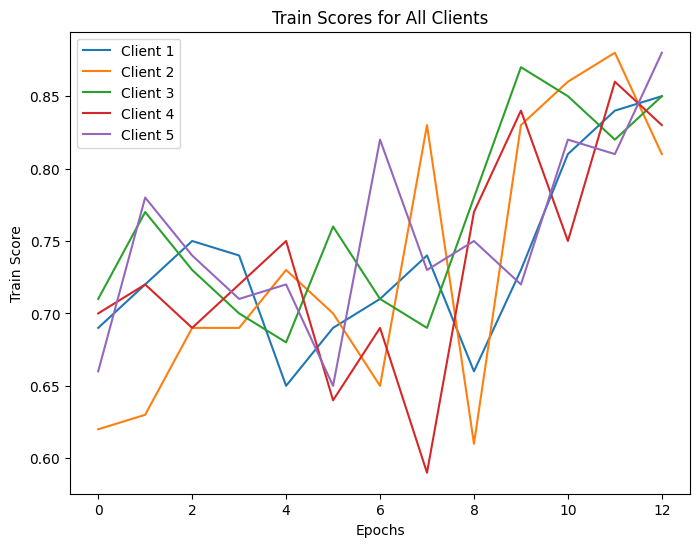

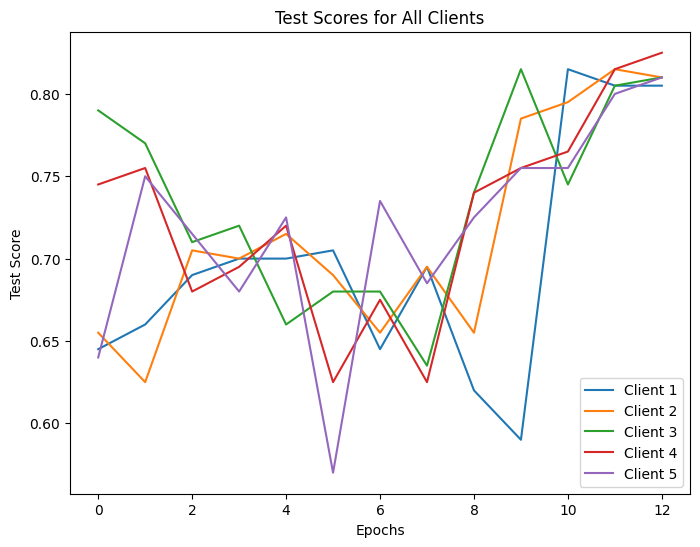

In [ ]:

import matplotlib.pyplot as plt
# Create two figures, one for train scores and one for test scores
plt.figure(figsize=(8, 6))

# Plot train scores for all clients
for client in clients:
    plt.plot(client.train_scores, label=f'Client {clients.index(client) + 1}')

plt.xlabel('Epochs')
plt.ylabel('Train Score')
plt.title('Train Scores for All Clients')
plt.legend()

# Show the train scores plot
plt.show()

# Create a new figure for test scores
plt.figure(figsize=(8, 6))

# Plot test scores for all clients
for client in clients:
    plt.plot(client.test_scores, label=f'Client {clients.index(client) + 1}')

plt.xlabel('Epochs')
plt.ylabel('Test Score')
plt.title('Test Scores for All Clients')
plt.legend()

# Show the test scores plot
plt.show()

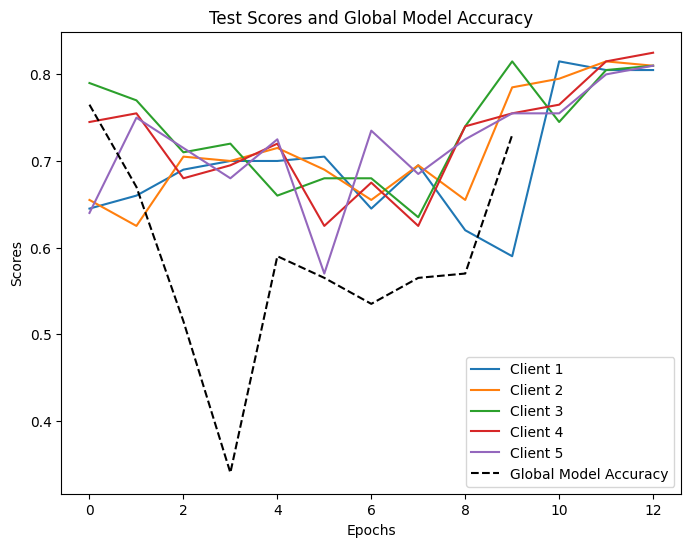

In [ ]:
import matplotlib.pyplot as plt

# Create a figure for the test scores
plt.figure(figsize=(8, 6))

# Plot test scores for all clients
for client in clients:
    plt.plot(client.test_scores, label=f'Client {clients.index(client) + 1}')

# Plot global model accuracy
plt.plot(global_model_accuracy, label='Global Model Accuracy', linestyle='--', color='black')

plt.xlabel('Epochs')
plt.ylabel('Scores')
plt.title('Test Scores and Global Model Accuracy')
plt.legend()

# Show the combined graph
plt.show()
